In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("test_result/test_eval.csv")
summary_df = pd.read_csv("test_result/test_eval_summary.csv")

In [4]:
df

,Unnamed: 0,input,output,WordFail,LenghtFail,สดับ1-รับ1,รับ1-รอง1,รับ1-ส่ง1,รอง1-ส่ง1,สดับ2-รับ2,...,ส่ง1-รับ2,ซ้ำสดับ1-รับ1,ซ้ำรับ1-รอง1,ซ้ำรับ1-ส่ง1,ซ้ำรอง1-ส่ง1,ซ้ำสดับ2-รับ2,ซ้ำรับ2-รอง2,ซ้ำรับ2-ส่ง2,ซ้ำรอง2-ส่ง2,ซ้ำส่ง1-รับ2
0,0,ถ้าได้แล้ว,ถ้าได้แล้วไต่ถามทรามส<s2>วาท</s2>\tที่นับปี<es...,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,แต่โฉมยง,แต่โฉมยงองค์ละเวงวัณฬา<s2>ราช</s2>\tต่างประ<es...,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,2,สุดสาคร,สุดสาครนอนจนขอบ<s2>บาท</s2>\tดูเห็น<es2>ญาติ</...,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,3,จึ่งเผยสิงห,จึ่งเผยสิงห<s2>หาย</s2>\tอยู่เป็น<es2>กาย</es2...,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,4,แล้วเชิญองค์ทรง,แล้วเชิญองค์ทรงกล่าวแสนเสียงสำเนียง<s2>เสียง</...,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,เขาทำของ,เขาทำของต่างมองแล้วจับ<s2>ข้อ</s2>\tจะผัน<es2>...,0,0,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
996,996,นางแม่ค้าปลาเค็ม,นางแม่ค้าปลาเค็มุลาคลาด<s2>หมิ่น</s2>\tจะสึก<e...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,997,อาจารย์หนึ่ง,อาจารย์หนึ่งวาเจ้าพลาย<s2>งาม</s2>\tล้วนของ<es...,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
998,998,จนแก่เฒ่าเง้า,จนแก่เฒ่าเง้าเผ้า<s2>พ่อ</s2>\tไม่พูด<es2>ว่า<...,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
columns_to_sum = ['สดับ1-รับ1', 'รับ1-รอง1', 'รับ1-ส่ง1', 'รอง1-ส่ง1',
                  'สดับ2-รับ2', 'รับ2-รอง2', 'รับ2-ส่ง2', 'รอง2-ส่ง2', 'ส่ง1-รับ2']

# Calculate the sum for each row and store it in a new column 'Sum'
df['Sum'] = df[columns_to_sum].sum(axis=1)

# Convert the 'Sum' column to a NumPy array
sumpass_sum_array = df['Sum'].to_numpy()
print("Rhyme Pairs")
print(f"Average: {np.average(sumpass_sum_array):.3f}, Std: {np.std(sumpass_sum_array):.3f}")
rhyme_likelihood = np.sum(sumpass_sum_array)/(len(sumpass_sum_array)*9)
print(f"Rhyme likelihood: {rhyme_likelihood:.4f} ({rhyme_likelihood*100:.2f}%)")

Rhyme Pairs
Average: 6.338, Std: 2.033
Rhyme likelihood: 0.7042 (70.42%)


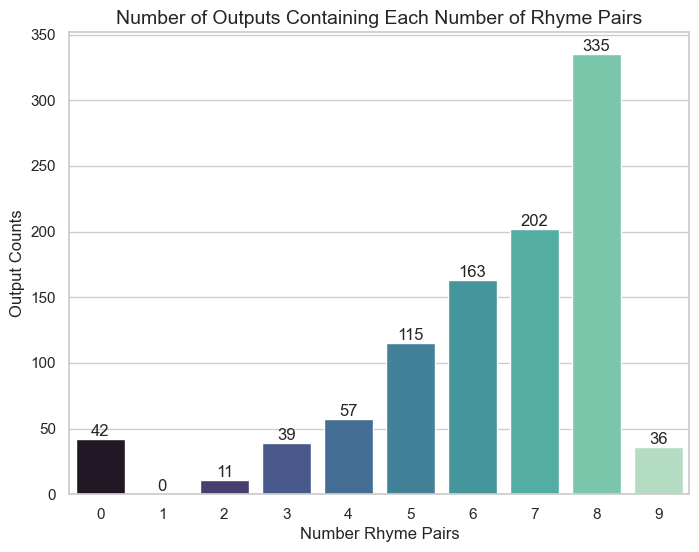

In [6]:
# Generate the histogram data
hist, bins = np.histogram(sumpass_sum_array, bins=np.arange(11))

# Set the Seaborn style
sns.set(style='whitegrid')

# Create the bar chart using Seaborn
colors = sns.color_palette('mako',10)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=bins[:-1], y=hist, palette=colors)
ax.bar_label(ax.containers[0])

# Set the labels and title
plt.xlabel('Number Rhyme Pairs', fontsize=12)
plt.ylabel('Output Counts', fontsize=12)
plt.title('Number of Outputs Containing Each Number of Rhyme Pairs', fontsize=14)
# Show the plot
plt.show()


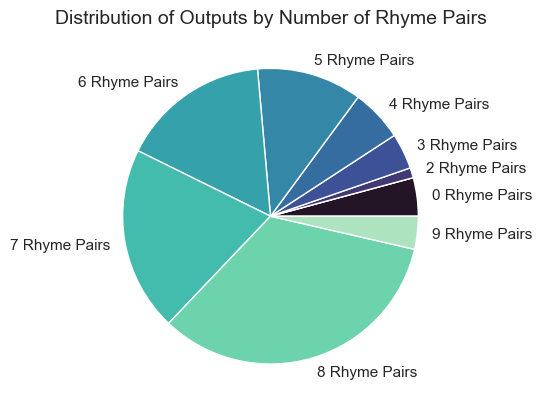

In [7]:
hist, bins = np.histogram(sumpass_sum_array, bins=np.arange(11))
labels = []
for i in range(10):
    if i == 1:
        labels.append("") #their is no any output containing 1 rhyme pairs (0 klon containing 1 rhyme pairs)
        continue
    labels.append(f"{i} Rhyme Pairs")

colors = sns.color_palette('mako',10)
plt.title('Distribution of Outputs by Number of Rhyme Pairs', fontsize=14)
plt.pie(hist, labels = labels, colors=colors)
plt.show() 

In [8]:
summary_df

,Unnamed: 0,0
0,WordFail,15
1,LenghtFail,27
2,สดับ1-รับ1,705
3,รับ1-รอง1,788
4,รับ1-ส่ง1,809
5,รอง1-ส่ง1,767
6,สดับ2-รับ2,757
7,รับ2-รอง2,788
8,รับ2-ส่ง2,830
9,รอง2-ส่ง2,787


In [10]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
matplotlib.rc('font', family='TH Sarabun New')


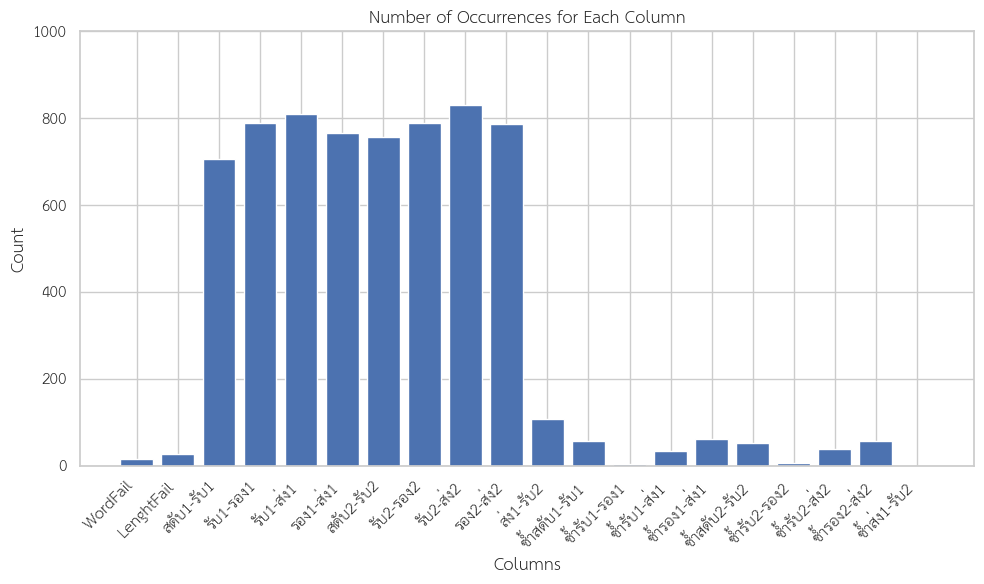

In [11]:
columns = summary_df['Unnamed: 0']
values = summary_df['0']

plt.figure(figsize=(10, 6))
plt.bar(columns, values)

plt.title('Number of Occurrences for Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')

plt.ylim((0,1000))

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [72]:
sumpass_columns = ['สดับ1-รับ1', 'รับ1-รอง1', 'รับ1-ส่ง1', 'รอง1-ส่ง1',
                  'สดับ2-รับ2', 'รับ2-รอง2', 'รับ2-ส่ง2', 'รอง2-ส่ง2', 'ส่ง1-รับ2']

count_of_ones = df[sumpass_columns].sum()

total_cells = df[sumpass_columns].count()

percentage_of_ones = (count_of_ones / total_cells) * 100

result_table = pd.DataFrame({'Rhyme Pair': sumpass_columns,
                             'Percentage': percentage_of_ones}).reset_index(drop=True)

result_table

,Rhyme Pair,Percentage
0,สดับ1-รับ1,70.5
1,รับ1-รอง1,78.8
2,รับ1-ส่ง1,80.9
3,รอง1-ส่ง1,76.7
4,สดับ2-รับ2,75.7
5,รับ2-รอง2,78.8
6,รับ2-ส่ง2,83.0
7,รอง2-ส่ง2,78.7
8,ส่ง1-รับ2,10.7


In [73]:
import pandas as pd

rhyme_position_likelihood = pd.DataFrame({
    'Rhyme Pair': ['สดับ-รับ', 'รับ-รอง', 'รับ-ส่ง', 'รอง-ส่ง', 'ระหว่างบท'],
    'Percentage': [
        result_table.loc[[0, 4], 'Percentage'].mean(),
        result_table.loc[[1, 5], 'Percentage'].mean(),
        result_table.loc[[2, 6], 'Percentage'].mean(),
        result_table.loc[[3, 7], 'Percentage'].mean(),
        result_table.loc[[8], 'Percentage'].mean()
    ]
})

print("Rhyme likelihood for each rhyme pair")
rhyme_position_likelihood


Rhyme likelihood for each rhyme pair


,Rhyme Pair,Percentage
0,สดับ-รับ,73.10
1,รับ-รอง,78.80
2,รับ-ส่ง,81.95
3,รอง-ส่ง,77.70
4,ระหว่างบท,10.70


In [71]:
sumpass_columns = ['ซ้ำสดับ1-รับ1', 'ซ้ำรับ1-รอง1', 'ซ้ำรับ1-ส่ง1', 'ซ้ำรอง1-ส่ง1',
                  'ซ้ำสดับ2-รับ2', 'ซ้ำรับ2-รอง2', 'ซ้ำรับ2-ส่ง2', 'ซ้ำรอง2-ส่ง2', 'ซ้ำส่ง1-รับ2']

count_of_ones = df[sumpass_columns].sum()

total_cells = df[sumpass_columns].count()

percentage_of_ones = (count_of_ones / total_cells) * 100

replicate_rhyme_table = pd.DataFrame({'Replicated Rhyme Pair': sumpass_columns,
                             'Percentage': percentage_of_ones}).reset_index(drop=True)

replicate_rhyme_table

,Replicated Rhyme Pair,Percentage
0,ซ้ำสดับ1-รับ1,5.7
1,ซ้ำรับ1-รอง1,0.3
2,ซ้ำรับ1-ส่ง1,3.3
3,ซ้ำรอง1-ส่ง1,6.2
4,ซ้ำสดับ2-รับ2,5.2
5,ซ้ำรับ2-รอง2,0.7
6,ซ้ำรับ2-ส่ง2,3.8
7,ซ้ำรอง2-ส่ง2,5.7
8,ซ้ำส่ง1-รับ2,0.0


In [75]:
import pandas as pd

replicated_rhyme_position_likelihood = pd.DataFrame({
    'Rhyme Pair': ['ซ้ำสดับ-รับ', 'ซ้ำรับ-รอง', 'ซ้ำรับ-ส่ง', 'ซ้ำรอง-ส่ง', 'ซ้ำระหว่างบท'],
    'Percentage': [
        replicate_rhyme_table.loc[[0, 4], 'Percentage'].mean(),
        replicate_rhyme_table.loc[[1, 5], 'Percentage'].mean(),
        replicate_rhyme_table.loc[[2, 6], 'Percentage'].mean(),
        replicate_rhyme_table.loc[[3, 7], 'Percentage'].mean(),
        replicate_rhyme_table.loc[[8], 'Percentage'].mean()
    ]
})

print("Replicated Rhyme likelihood for each rhyme pair")
replicated_rhyme_position_likelihood


Replicated Rhyme likelihood for each rhyme pair


,Rhyme Pair,Percentage
0,ซ้ำสดับ-รับ,5.45
1,ซ้ำรับ-รอง,0.50
2,ซ้ำรับ-ส่ง,3.55
3,ซ้ำรอง-ส่ง,5.95
4,ซ้ำระหว่างบท,0.00


In [86]:
rhyme_likelihoods = list(np.array(rhyme_position_likelihood.drop(["Rhyme Pair"],axis=1)).reshape(-1))
replicated_rhyme_likelihoods = list(np.array(replicated_rhyme_position_likelihood.drop(["Rhyme Pair"],axis=1)).reshape(-1))
non_replicated_rhyme_position_likelihood = pd.DataFrame({
    'Rhyme Pair': ['สดับ-รับ', 'รับ-รอง', 'รับ-ส่ง', 'รอง-ส่ง', 'ระหว่างบท'],
    'Percentage': [a-b for a,b in zip(rhyme_likelihoods,replicated_rhyme_likelihoods)]
})
print("Non-Replicated Rhyme likelihood for each rhyme pair")
non_replicated_rhyme_position_likelihood

Non-Replicated Rhyme likelihood for each rhyme pair


,Rhyme Pair,Percentage
0,สดับ-รับ,67.65
1,รับ-รอง,78.30
2,รับ-ส่ง,78.40
3,รอง-ส่ง,71.75
4,ระหว่างบท,10.70


In [90]:
non_replicated_rhyme_position_likelihood.shape[0]

5

In [100]:
weight = [2,2,2,2,1]
cnt = 0
sum = 0
for i in range(non_replicated_rhyme_position_likelihood.shape[0]):
    sum += rhyme_position_likelihood.loc[i,"Percentage"] * weight[i]
    cnt += weight[i]
average_likelihood = sum/cnt
print(f"rhyme average likelihood: {average_likelihood:.2f}%")

weight = [2,2,2,2,1]
cnt = 0
sum = 0
for i in range(non_replicated_rhyme_position_likelihood.shape[0]):
    sum += non_replicated_rhyme_position_likelihood.loc[i,"Percentage"] * weight[i]
    cnt += weight[i]
average_likelihood = sum/cnt
print(f"non-replicated rhyme average likelihood: {average_likelihood:.2f}%")

rhyme average likelihood: 70.42%
non-replicated rhyme average likelihood: 66.99%
